# Tensor Creation

This notebook focuses on the creation of the tensors for machine and deep learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import os
import dask
import skimage
import glob
data_dir = os.path.join(os.path.dirname(os.getcwd()), 'data')

In [2]:
imread = dask.delayed(skimage.io.imread, pure=True)
filenames = sorted(glob.glob(f"{data_dir}/Features/*.tif"))
lazy_images = [imread(path) for path in filenames]
lazy_flat = [i.flatten() for i in lazy_images]
sample = lazy_flat[0].compute()
arrays = [da.from_delayed(lazy_image, dtype=sample.dtype, shape=sample.shape) for lazy_image in lazy_flat]
stack = da.stack(arrays, axis=1)

In [4]:
df = dd.from_dask_array(stack, columns=names)
df

,Areas_of_Interest,Log_Distance_to_Archaean_Contact,Log_Distance_to_Faults,Log_GCAS_RTP_1VD,Log_GCAS_RTP_2VD,Log_SA_GRAV_Slope,MT_20000m,MT_50000m,SA_GRAV,SA_GRAV_1VD,SA_RESIDUAL,SA_TMI_RTP,Zones
npartitions=1,,,,,,,,,,,,,
0,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
6391571,...,...,...,...,...,...,...,...,...,...,...,...,...


In [17]:
df.head()

,Areas_of_Interest,Log_Distance_to_Archaean_Contact,Log_Distance_to_Faults,Log_GCAS_RTP_1VD,Log_GCAS_RTP_2VD,Log_SA_GRAV_Slope,MT_20000m,MT_50000m,SA_GRAV,SA_GRAV_1VD,SA_RESIDUAL,SA_TMI_RTP,Zones
0,-1.0,-99999.0,-99999.0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
1,-1.0,-99999.0,-99999.0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
2,-1.0,-99999.0,-99999.0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
3,-1.0,-99999.0,-99999.0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
4,-1.0,-99999.0,-99999.0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [6]:
df_tt = df[df['Areas_of_Interest'] != -1].compute()
df_tt

,Areas_of_Interest,Log_Distance_to_Archaean_Contact,Log_Distance_to_Faults,Log_GCAS_RTP_1VD,Log_GCAS_RTP_2VD,Log_SA_GRAV_Slope,MT_20000m,MT_50000m,SA_GRAV,SA_GRAV_1VD,SA_RESIDUAL,SA_TMI_RTP,Zones
221131,0.0,9.317426,10.639132,1.747967,1.282043,-2.268688,2.323293,2.706226,-9.741625,0.003272,2.279978,111.083755,2.0
275260,0.0,9.546973,10.615351,2.673912,1.708956,-2.787659,2.306746,2.698171,-8.473590,0.002389,1.719324,-53.269314,2.0
323985,0.0,9.224206,10.580169,1.656459,-0.221074,-2.685827,2.289121,2.708424,-3.992554,0.004786,3.351179,-168.483521,2.0
442865,1.0,8.378877,8.515255,2.262401,-0.748839,-2.695364,1.763430,2.098865,-4.909769,0.005727,3.855369,445.482697,2.0
540253,0.0,8.799414,8.799414,1.526737,-0.781344,-2.663550,1.601960,1.987154,-5.280754,0.004098,2.991362,516.428467,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366444,1.0,4.839822,8.376886,3.822356,1.922945,-3.385978,3.885334,3.519293,-14.638707,0.000439,0.159652,-8.922378,24.0
6369150,1.0,5.114939,8.431977,3.833668,2.032393,-3.212128,3.879424,3.516555,-14.760900,0.000557,0.193758,-62.946705,24.0
6372023,0.0,7.245485,7.751619,4.259253,2.310755,-1.824680,3.048379,2.056857,-15.353344,0.002957,0.613988,198.818634,24.0
6372242,0.0,5.711173,5.711173,3.711190,2.474739,-5.217255,2.938949,3.105232,-8.322723,0.001366,1.046216,164.810226,25.0


In [7]:
df.to_csv('GawleData.csv', single_file=True)
df_tt.to_csv('AOI.csv')

In [72]:
df_tt["Areas_of_Interest"] = df_tt["Areas_of_Interest"].astype(float)
df_tt = df_tt.sort_values('Zones')
X = df_tt.drop(['Areas_of_Interest', 'Zones'], axis=1)
Y = df_tt['Areas_of_Interest'].astype(int)
Z = df_tt['Zones'].astype(int)

In [20]:
df_tt.drop(['Areas_of_Interest', 'Zones'], axis=1)

,Log_Distance_to_Archaean_Contact,Log_Distance_to_Faults,Log_GCAS_RTP_1VD,Log_GCAS_RTP_2VD,Log_SA_GRAV_Slope,MT_20000m,MT_50000m,SA_GRAV,SA_GRAV_1VD,SA_RESIDUAL,SA_TMI_RTP
221131,9.317426,10.639132,1.747967,1.282043,-2.268688,2.323293,2.706226,-9.741625,0.003272,2.279978,111.083755
275260,9.546973,10.615351,2.673912,1.708956,-2.787659,2.306746,2.698171,-8.473590,0.002389,1.719324,-53.269314
323985,9.224206,10.580169,1.656459,-0.221074,-2.685827,2.289121,2.708424,-3.992554,0.004786,3.351179,-168.483521
442865,8.378877,8.515255,2.262401,-0.748839,-2.695364,1.763430,2.098865,-4.909769,0.005727,3.855369,445.482697
540253,8.799414,8.799414,1.526737,-0.781344,-2.663550,1.601960,1.987154,-5.280754,0.004098,2.991362,516.428467
...,...,...,...,...,...,...,...,...,...,...,...
6301907,4.794821,7.949560,1.985071,0.186991,-2.246075,2.871247,3.173510,-14.571733,-0.001474,-0.835423,377.081482
6301994,7.059896,7.059896,2.333378,1.555925,-2.216252,2.646135,3.357282,-9.199225,0.001058,0.860368,-126.783112
5801215,10.107053,9.950755,1.839199,0.308863,-3.783532,3.041553,2.727454,-12.821439,0.000258,0.372248,-57.433186
5798541,10.057702,10.208198,2.246461,-0.154233,-4.058258,2.862626,2.428889,-14.963561,0.000112,0.069255,-32.068565


In [37]:
column_names = ["SA_TMI_RTP", "SA_RESIDUAL", "SA_GRAV", "SA_GRAV_1VD", "Log_GCAS_RTP_1VD", "Log_GCAS_RTP_2VD", "Log_SA_GRAV_Slope", "MT_20000m", "MT_50000m", "Log_Distance_to_Faults", "Log_Distance_to_Archaean_Contact"]

X = X.reindex(columns=column_names)
X

,SA_TMI_RTP,SA_RESIDUAL,SA_GRAV,SA_GRAV_1VD,Log_GCAS_RTP_1VD,Log_GCAS_RTP_2VD,Log_SA_GRAV_Slope,MT_20000m,MT_50000m,Log_Distance_to_Faults,Log_Distance_to_Archaean_Contact
221131,111.083755,2.279978,-9.741625,0.003272,1.747967,1.282043,-2.268688,2.323293,2.706226,10.639132,9.317426
275260,-53.269314,1.719324,-8.473590,0.002389,2.673912,1.708956,-2.787659,2.306746,2.698171,10.615351,9.546973
323985,-168.483521,3.351179,-3.992554,0.004786,1.656459,-0.221074,-2.685827,2.289121,2.708424,10.580169,9.224206
442865,445.482697,3.855369,-4.909769,0.005727,2.262401,-0.748839,-2.695364,1.763430,2.098865,8.515255,8.378877
540253,516.428467,2.991362,-5.280754,0.004098,1.526737,-0.781344,-2.663550,1.601960,1.987154,8.799414,8.799414
...,...,...,...,...,...,...,...,...,...,...,...
6239694,478.409576,0.927576,-11.645353,0.001616,2.416822,-0.530863,-3.655354,2.576199,3.150152,9.114048,4.835357
6301907,377.081482,-0.835423,-14.571733,-0.001474,1.985071,0.186991,-2.246075,2.871247,3.173510,7.949560,4.794821
6301994,-126.783112,0.860368,-9.199225,0.001058,2.333378,1.555925,-2.216252,2.646135,3.357282,7.059896,7.059896
5801215,-57.433186,0.372248,-12.821439,0.000258,1.839199,0.308863,-3.783532,3.041553,2.727454,9.950755,10.107053


In [19]:

X = X.sample(frac=1).reset_index(drop=True)
X

,Log_Distance_to_Archaean_Contact,Log_Distance_to_Faults,Log_GCAS_RTP_1VD,Log_GCAS_RTP_2VD,Log_SA_GRAV_Slope,MT_20000m,MT_50000m,SA_GRAV,SA_GRAV_1VD,SA_RESIDUAL,SA_TMI_RTP
0,8.115611,4.755019,4.401896,1.386382,-2.923884,2.631765,1.324272,1.539092,0.004318,2.769534,4480.886230
1,8.208385,6.544245,2.007311,0.691089,-2.922028,2.761045,3.660867,-27.686293,-0.000014,-0.030253,-241.612122
2,7.982749,4.422009,3.487556,1.846247,-1.734951,3.131797,3.609041,17.430124,0.002186,2.022074,70.566498
3,8.503797,7.030306,2.039827,-1.644677,-0.866994,2.159054,2.587236,-6.610072,0.006734,4.672494,1641.972290
4,6.670622,8.672914,3.515368,2.487801,-2.755550,2.750366,3.110383,-6.870591,-0.000824,-0.620919,-301.022034
...,...,...,...,...,...,...,...,...,...,...,...
740,8.779826,6.827626,0.264335,-0.717192,-2.574240,3.705889,3.678016,-13.026275,0.000313,0.172086,-422.639099
741,8.711586,3.896676,1.865654,-1.886413,-1.080575,2.181245,2.594400,-2.600010,0.012805,7.465989,1611.260986
742,6.397596,7.524432,3.036760,2.237048,-1.437650,3.859944,3.560470,-28.924000,0.002129,1.626900,234.765701
743,5.752948,5.752948,4.444411,1.259437,-2.862844,1.459257,2.412777,-1.188125,0.006426,2.483944,3268.983398


(11.7, -0.7)

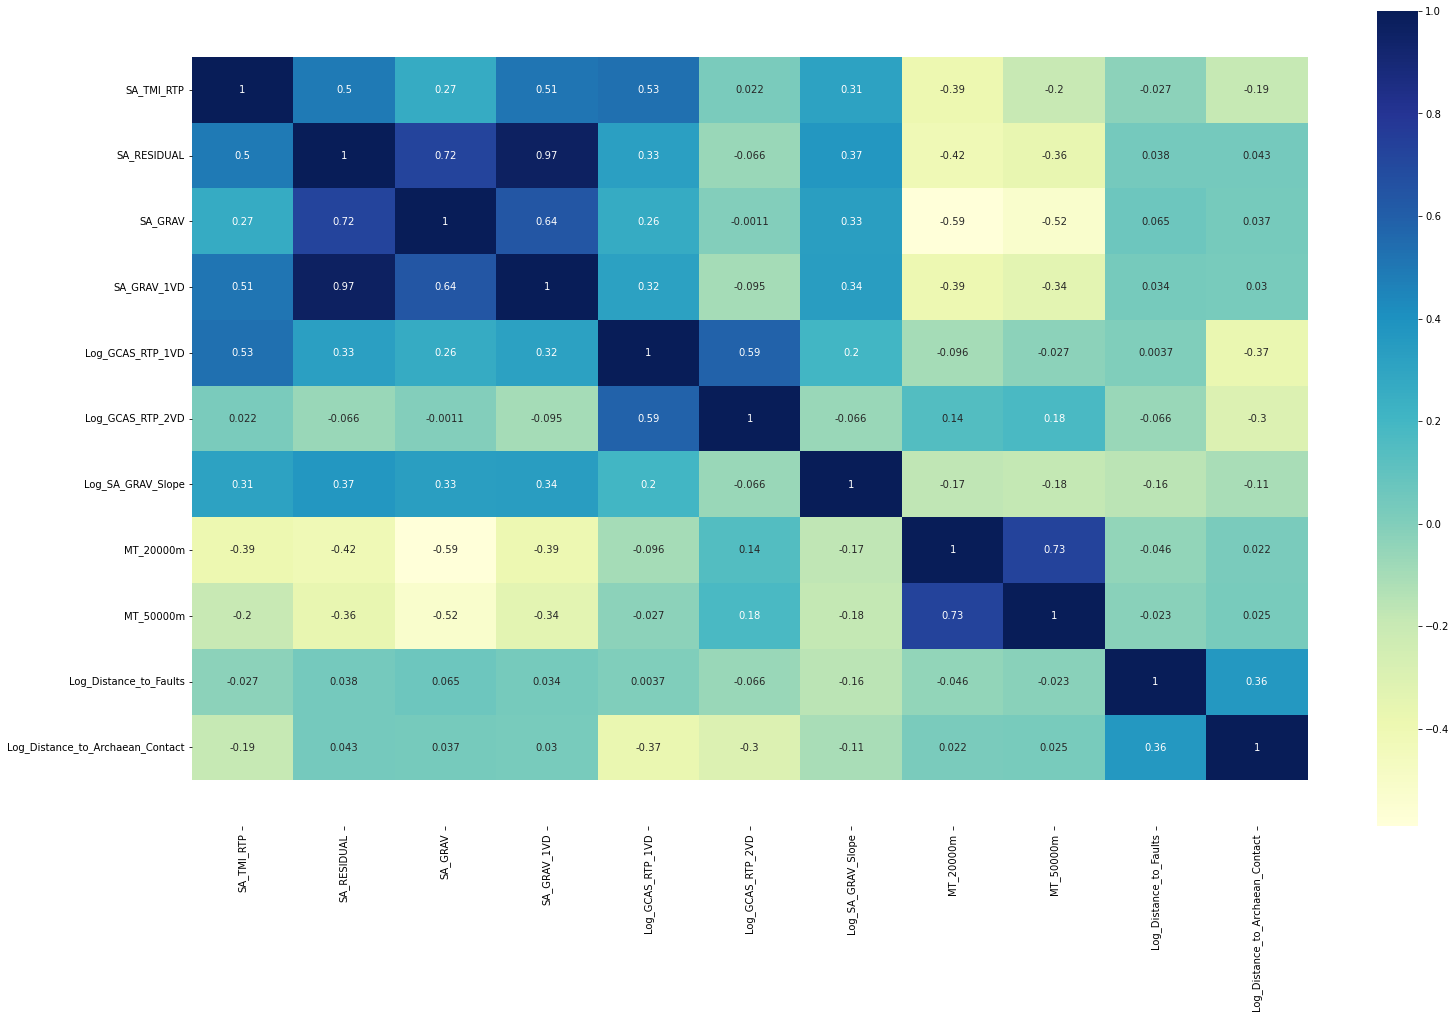

In [29]:
plt.figure(figsize=(25,15))

#plot correlation heat map
ax=sns.heatmap(X.corr(method='spearman'),annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.7, top - 0.7)

In [70]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','ANOVA-F Score']
ANOVA = featureScores

ValueError: Found input variables with inconsistent numbers of samples: [1000, 745]

In [49]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all')
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Mutual_Information']
MIC = featureScores


In [55]:
rf = RandomForestClassifier()
rf.fit(X, Y)
importances = rf.feature_importances_
final_df = pd.DataFrame({"Features": X.columns, "RandomForest":importances})
final_df.set_index('RandomForest')
randomForest = final_df


In [56]:
randomForest


,Features,RandomForest
0,SA_TMI_RTP,0.106712
1,SA_GRAV,0.121254
2,SA_GRAV_1VD,0.065126
3,Log_GCAS_RTP_1VD,0.068698
4,Log_GCAS_RTP_2VD,0.044508
5,Log_SA_GRAV_Slope,0.057475
6,MT_20000m,0.162176
7,MT_50000m,0.155985
8,Log_Distance_to_Faults,0.128784
9,Log_Distance_to_Archaean_Contact,0.089283


In [60]:
combineDf['Random_Forest'] = randomForest['RandomForest']

In [62]:
combineDf

,Features,ANOVA-F Score,Mutual_Information,Random_Forest
0,SA_TMI_RTP,0.335451,0.105552,0.106712
1,SA_GRAV,0.372752,0.126943,0.121254
2,SA_GRAV_1VD,9.092838,0.054320,0.065126
3,Log_GCAS_RTP_1VD,11.988377,0.052255,0.068698
4,Log_GCAS_RTP_2VD,16.119684,0.002119,0.044508
5,Log_SA_GRAV_Slope,15.235015,0.044998,0.057475
6,MT_20000m,3.659632,0.258994,0.162176
7,MT_50000m,5.340121,0.278560,0.155985
8,Log_Distance_to_Faults,80.112831,0.077745,0.128784
9,Log_Distance_to_Archaean_Contact,3.545117,0.066070,0.089283


In [79]:
#Selecting two different machine learning models
rf = RandomForestClassifier()
lr = LogisticRegression()
rfecv_rf=RFECV(estimator=rf, step=1, cv=gss, scoring='f1_weighted')
rfecv_rf.fit(X,Y, Z)
rfecv_lr=RFECV(estimator=lr, step=1, cv=gss, scoring='f1_weighted')
rfecv_lr.fit(X,Y, Z)

TypeError: fit() takes from 2 to 3 positional arguments but 4 were given